# ML E2E with Boston house price dataset

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Load dataset
#from sklearn.datasets import load_boston

boston = pd.read_csv('C:/Roshan/1_SCMS/5_artofHack/12_ML_E2E_ineuron/Boston.csv')

In [17]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
boston.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# Preparing the dataset

In [21]:
df = boston
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [24]:
# summarizing stats of the data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
# Check missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# EDA

In [26]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [27]:
import seaborn as sns

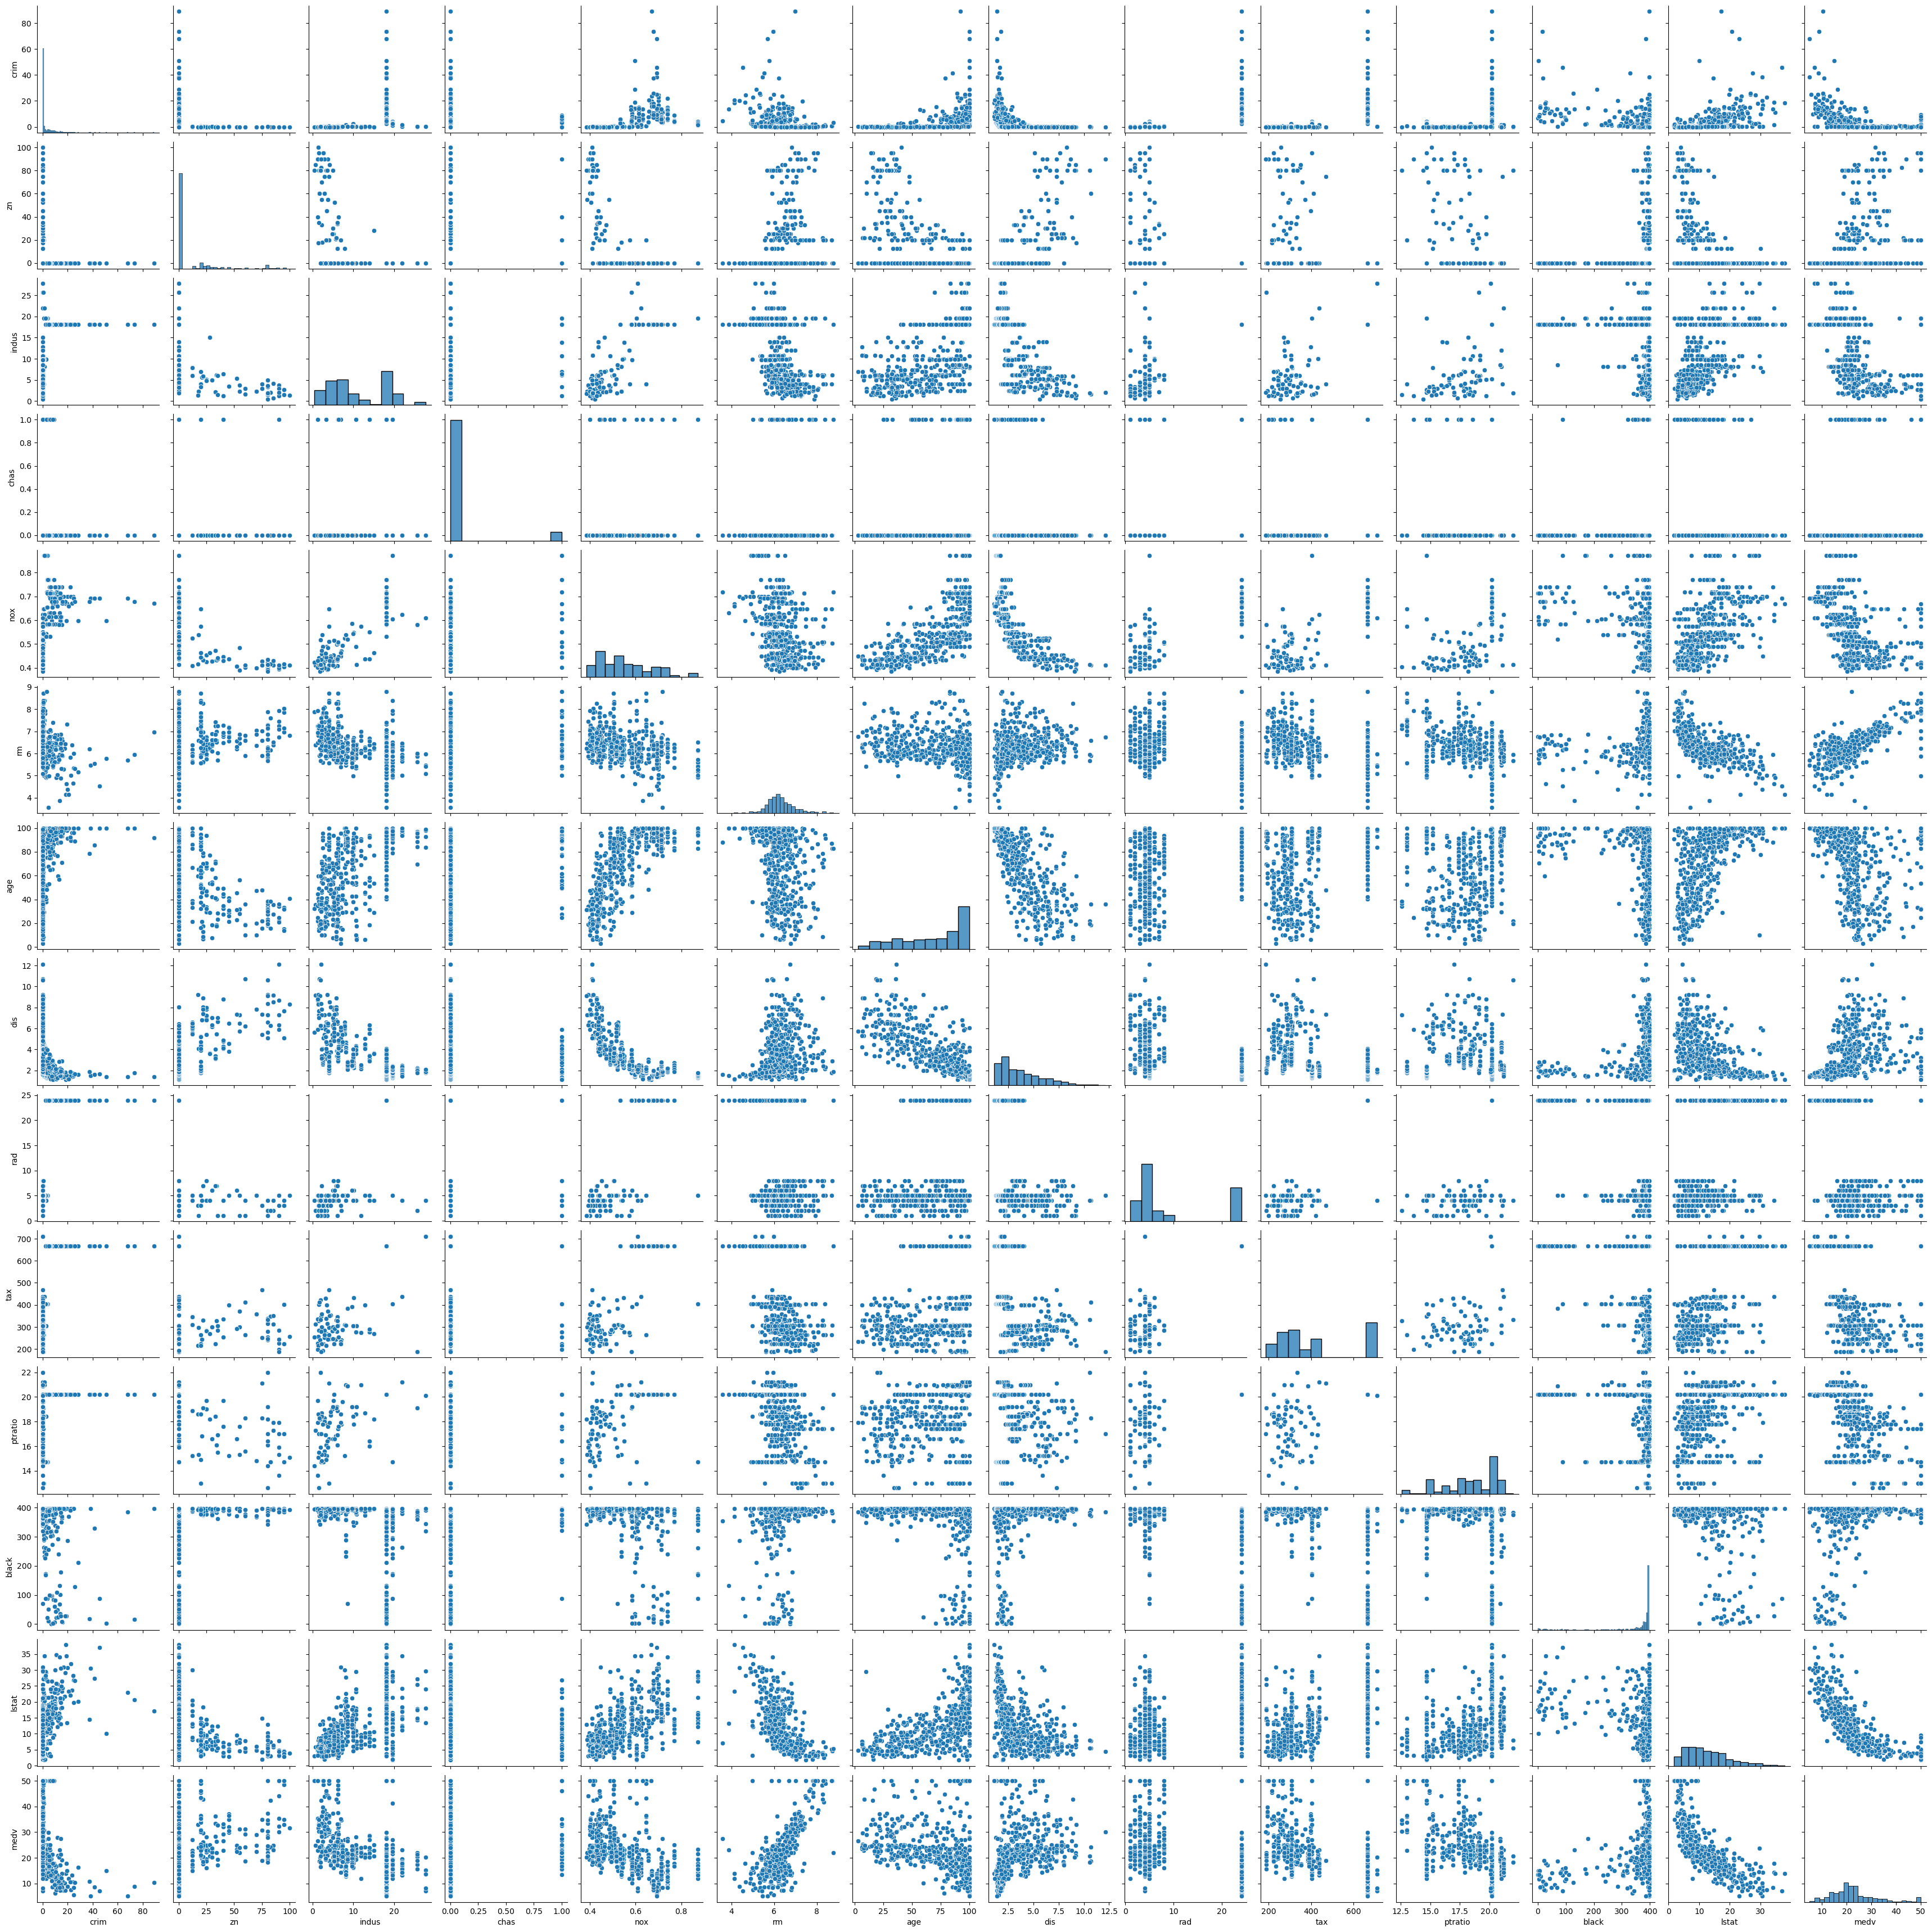

In [28]:
sns.pairplot(df)

# Train-Test split

In [29]:
# Dependent and independent features
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [30]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [32]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

# Model Training

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression()

In [60]:
regression.fit(x_train, y_train)

LinearRegression()

In [38]:
print(regression.coef_)

[-1.18254028  1.01875112 -0.36952988  0.99966815 -1.44462486  2.5510795
  0.205513   -2.51721878  2.43155738 -1.31329689 -1.79482637  1.13605761
 -3.98293263]


In [39]:
print(regression.intercept_)

22.629378531073442


In [40]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [41]:
# predictions
reg_pred = regression.predict(x_test)

Text(0, 0.5, 'y_test')

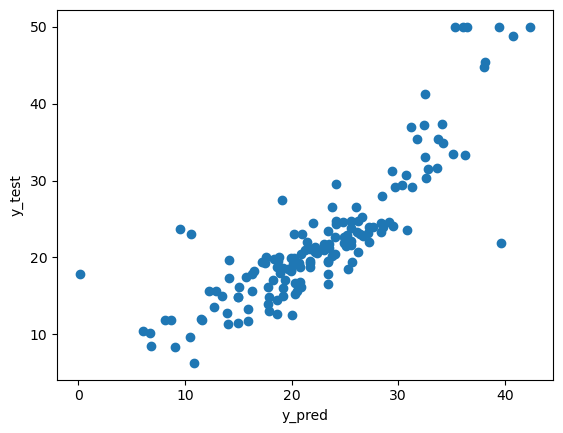

In [42]:
## plot 
plt.scatter(reg_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [43]:
residuals = y_test-reg_pred

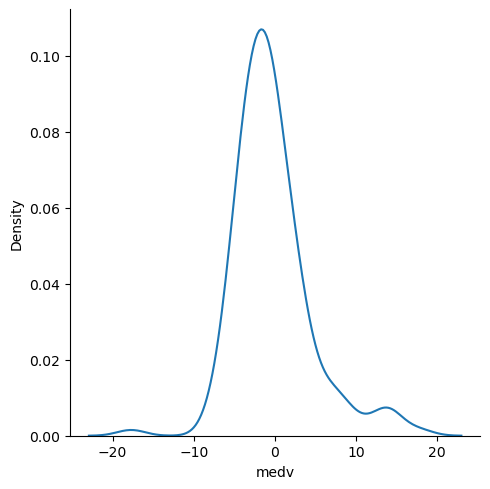

In [44]:
# plot residuals
sns.displot(residuals, kind = 'kde')

Text(0, 0.5, 'residuals')

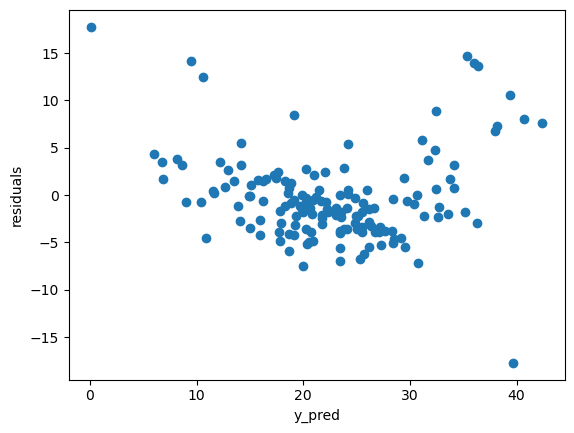

In [45]:
## plot w.r.t. prediction and residuals
plt.scatter(reg_pred, residuals)
plt.xlabel('y_pred')
plt.ylabel('residuals')

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
print('mae',mean_absolute_error(y_test, reg_pred))
print('mse',mean_squared_error(y_test, reg_pred))
print('sqrt-mse',np.sqrt(mean_squared_error(y_test, reg_pred)))

mae 3.400508956597988
mse 22.431936070737564
sqrt-mse 4.736236488050144


# R square and adjusted R square

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
score

0.7147895265576845

# New Data Prediction

In [57]:
np.array(boston.iloc[0]).reshape(1,-1)
# boston[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00, 2.400e+01]])

In [78]:
scaler.transform(np.array(boston.iloc[0][:-1]).reshape(1,-1))

c:\Users\Roshan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.40111539,  0.34103036, -1.29183999, -0.28154625, -0.13695507,
         0.43265755, -0.10559532,  0.13979956, -0.98518762, -0.66399517,
        -1.42560109,  0.43589051, -1.07507356]])

In [79]:
regression.predict(scaler.transform(np.array(boston.iloc[0][:-1]).reshape(1,-1)))

c:\Users\Roshan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.38737584])

# Pickling the model file for deployment

In [80]:
import pickle

In [81]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [82]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [84]:
pickled_model.predict(scaler.transform(np.array(boston.iloc[0][:-1]).reshape(1,-1)))

c:\Users\Roshan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.38737584])